# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [41]:
data = pd.read_csv("assignment3_creditcard.csv")

In [42]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28673,2.063299,0.015015,-1.042161,0.409655,-0.069835,-1.198490,0.243507,-0.385099,0.408691,0.047861,...,-0.169749,-0.278942,-0.625629,0.331276,0.070205,-0.269826,0.192509,-0.064914,-0.058058,0
28674,1.264844,-1.228616,1.579098,-0.204514,-1.958881,0.546495,-1.764072,0.470377,1.002209,0.274005,...,-0.125401,0.144909,0.718615,-0.038493,0.103706,0.341100,-0.009807,0.089794,0.019848,0
28675,2.072659,0.190048,-1.759688,0.378909,0.556826,-0.769874,0.246899,-0.274561,0.380960,-0.405147,...,-0.084170,-0.361188,-0.910782,0.304372,0.401511,-0.212440,0.177857,-0.058961,-0.029035,0
28676,-0.690637,1.342271,1.498129,2.049774,1.055691,0.677197,0.855445,-0.467242,-0.681576,1.485542,...,0.030868,0.110939,0.453065,-0.355346,-0.771072,-0.358505,0.101309,-0.849084,-0.312999,0


In [43]:
# 데이터 살펴보니 정규화 안되있음으로 나중에 정규화를 시도한다. 

In [44]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

<AxesSubplot:xlabel='Class', ylabel='count'>

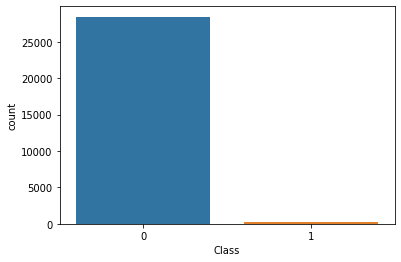

In [45]:
sns.countplot(x="Class", data=data)
# 타켓 변수가 너무 unbalance 한 현상 

In [ ]:
# 점수에 영향을 줄 수 있으므로 다운 샘플링을 진행하여 target 변수들의 비율을 맞추어 준다. 이는 점수 향상에 도움을 줄 수 있다. 

In [46]:
#pip install imblearn

In [51]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler 

undersample = RandomUnderSampler(sampling_strategy=0.5)

In [47]:
cols = data.columns.tolist()
cols = [c for c in cols if c not in ["Class"]]
target = "Class"


In [48]:
# X 와 y 를 각각 따로 지정해준다. 
X = data[cols]
y = data[target]
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,0.159752,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,0.644970,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,-0.885471,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.663398,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.531789,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28673,2.063299,0.015015,-1.042161,0.409655,-0.069835,-1.198490,0.243507,-0.385099,0.408691,0.047861,...,0.137028,-0.169749,-0.278942,-0.625629,0.331276,0.070205,-0.269826,0.192509,-0.064914,-0.058058
28674,1.264844,-1.228616,1.579098,-0.204514,-1.958881,0.546495,-1.764072,0.470377,1.002209,0.274005,...,0.643614,-0.125401,0.144909,0.718615,-0.038493,0.103706,0.341100,-0.009807,0.089794,0.019848
28675,2.072659,0.190048,-1.759688,0.378909,0.556826,-0.769874,0.246899,-0.274561,0.380960,-0.405147,...,0.104002,-0.084170,-0.361188,-0.910782,0.304372,0.401511,-0.212440,0.177857,-0.058961,-0.029035
28676,-0.690637,1.342271,1.498129,2.049774,1.055691,0.677197,0.855445,-0.467242,-0.681576,1.485542,...,0.057182,0.030868,0.110939,0.453065,-0.355346,-0.771072,-0.358505,0.101309,-0.849084,-0.312999


In [54]:
#undersample
X_under, y_under = undersample.fit_resample(X, y)

# MODEL 

In [56]:
from sklearn.model_selection import train_test_split
# train, test 분리 
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state = 42, stratify = y_under)

## Logistic Regression 

In [63]:
from sklearn.linear_model import LogisticRegression

#모델 훈련시키기
model = LogisticRegression(random_state=2)
logit = model.fit(X_train, y_train)



In [64]:
#predictions
y_pred_logit = model.predict(X_test) 

In [65]:
# 점수 지표 업로드 


from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

In [66]:
#scores
print("Accuracy Logit:",metrics.accuracy_score(y_test, y_pred_logit))
print("Precision Logit:",metrics.precision_score(y_test, y_pred_logit))
print("Recall Logit:",metrics.recall_score(y_test, y_pred_logit))
print("F1 Score Logit:",metrics.f1_score(y_test, y_pred_logit))

Accuracy Logit: 0.9594594594594594
Precision Logit: 0.9577464788732394
Recall Logit: 0.918918918918919
F1 Score Logit: 0.9379310344827587


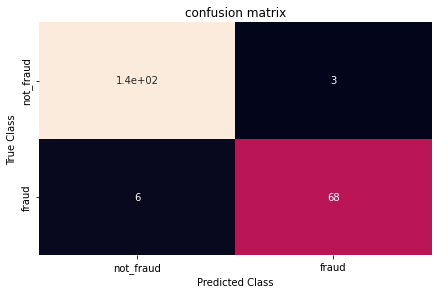

In [74]:
# 매트릭스 구하기 
matrix_logit = confusion_matrix(y_test, y_pred_logit)
cm_logit = pd.DataFrame(matrix_logit, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_logit, annot=True, cbar=None)
plt.title('confusion matrix'), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

# AUC

In [77]:

y_pred_logit_proba = model.predict_proba(X_test)[::,1]
fpr_logit, tpr_logit, _ = metrics.roc_curve(y_test,  y_pred_logit_proba)
auc_logit = metrics.roc_auc_score(y_test, y_pred_logit_proba)
print("AUC  :", auc_logit)

AUC  : 0.9698685171658145


#  AUC 기준으로 성능 개선 시도 

why? 본 데이터의 특성상 target의 기준이 balance 하게 되어 있지 않다. 따라서, accuracy 의 경우 예를 들어, 100개의 사람에서 99명이 건강한 사람이고, 1명이 환자일 경우-> prediction을 하더라도 99명이 건강하기 때문에 이미 데이터셋은 정확도가 99%이다. 따라서 정확한 모델 평가하는 것은 어렵다. 따라서 confusion matrix를 보면서 정확한 비율을 따져 AUC를 구하는 것이 정확한 모델을 평가하는 것에 도움이 된다. 